In [1]:
!mkdir /content/btp

In [2]:
cd /content/btp

/content/btp


In [3]:
import zipfile

In [4]:
dataset_path="/content/drive/MyDrive/BTP/archive.zip"
zfile = zipfile.ZipFile(dataset_path)

In [5]:
zfile.extractall(path = "/content/btp")

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense ,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
from keras.optimizers import SGD


In [7]:
train_path ="/content/btp/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_path = "/content/btp/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

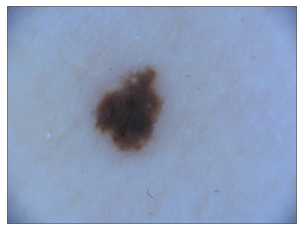

In [ ]:
img = load_img("/content/btp/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000041.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  9


# **Inception Based Model**

In [ ]:
model = Sequential()
model.add(InceptionV3(include_top=False, input_shape=(299,299,3)))
model.add(Flatten())
model.add(Dense(32))
model.add(LeakyReLU(0.001))
model.add(Dense(16))
model.add(LeakyReLU(0.001))
model.add(Dense(numberOfClass, activation='softmax'))
model.layers[0].trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4194336   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
batch_size = 250

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=(299,299),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= 'categorical')

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=(299,299),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= 'categorical')

hist = model.fit_generator(
        generator = train_generator,
        epochs=500,
        validation_data = test_generator,
        validation_steps = 250)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
9/9 [==============================] - 98s 10s/step - loss: 13.8465 - accuracy: 0.1198 - val_loss: 4.5659 - val_accuracy: 0.1695
Epoch 2/500
9/9 [==============================] - 69s 8s/step - loss: 3.0198 - accuracy: 0.2184
Epoch 3/500
9/9 [==============================] - 69s 8s/step - loss: 2.0949 - accuracy: 0.2296
Epoch 4/500
9/9 [==============================] - 69s 8s/step - loss: 2.1471 - accuracy: 0.1841
Epoch 5/500
9/9 [==============================] - 69s 8s/step - loss: 2.1571 - accuracy: 0.1905
Epoch 6/500
9/9 [==============================] - 69s 8s/step - loss: 2.1449 - accuracy: 0.1944
Epoch 7/500
9/9 [==============================] - 69s 8s/step - loss: 4.4228 - accuracy: 0.1761
Epoch 8/500
9/9 [==============================] - 69s 8s/step - loss: 2.2627 - accuracy: 0.2130
Epoch 9/500
9/9 [==============================] - 69s 8s/step - loss: 2.1101 - accuracy: 0.2057
Epoch 10/500
9/9 [==============================] - 69s 8s/step - loss: 2.0485 - ac

In [ ]:
model.save("inceptionV3.h5")

# **NEW**

# Data Augmentation

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip = True)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


# Basic CNN

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(9, activation='softmax'))


In [ ]:
# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(x=train_generator, validation_data=test_generator, epochs=5)
cnn.save("cnn_cancer.h5")

Epoch 1/5
70/70 [==============================] - 41s 570ms/step - loss: 2.7594 - accuracy: 0.1821 - val_loss: 2.3142 - val_accuracy: 0.1017
Epoch 2/5
70/70 [==============================] - 39s 561ms/step - loss: 1.9342 - accuracy: 0.2541 - val_loss: 2.1254 - val_accuracy: 0.2966
Epoch 3/5
70/70 [==============================] - 39s 557ms/step - loss: 1.7604 - accuracy: 0.3684 - val_loss: 2.2317 - val_accuracy: 0.2119
Epoch 4/5
70/70 [==============================] - 39s 560ms/step - loss: 1.6457 - accuracy: 0.4135 - val_loss: 2.2382 - val_accuracy: 0.3475
Epoch 5/5
70/70 [==============================] - 39s 562ms/step - loss: 1.4726 - accuracy: 0.4799 - val_loss: 2.2206 - val_accuracy: 0.3475


# **Two block VGG Model**

In [9]:
from keras.models import Sequential 
from keras.optimizers import SGD

def define_model2():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(9, activation='softmax'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [10]:
define_model2().fit(x=train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
70/70 [==============================] - 74s 596ms/step - loss: 2.2487 - accuracy: 0.2103 - val_loss: 2.1907 - val_accuracy: 0.2034
Epoch 2/20
70/70 [==============================] - 39s 563ms/step - loss: 1.9151 - accuracy: 0.3308 - val_loss: 2.1386 - val_accuracy: 0.2542
Epoch 3/20
70/70 [==============================] - 39s 563ms/step - loss: 1.8271 - accuracy: 0.3631 - val_loss: 2.1367 - val_accuracy: 0.1864
Epoch 4/20
70/70 [==============================] - 39s 561ms/step - loss: 1.7523 - accuracy: 0.3682 - val_loss: 2.0458 - val_accuracy: 0.2373
Epoch 5/20
70/70 [==============================] - 39s 560ms/step - loss: 1.6752 - accuracy: 0.3815 - val_loss: 2.0853 - val_accuracy: 0.2627
Epoch 6/20
70/70 [==============================] - 39s 562ms/step - loss: 1.6335 - accuracy: 0.4183 - val_loss: 2.1692 - val_accuracy: 0.2288
Epoch 7/20
70/70 [==============================] - 39s 558ms/step - loss: 1.6039 - accuracy: 0.4212 - val_loss: 2.0694 - val_accuracy: 0.2797

# **One Block VGG Model**


In [ ]:
def define_model1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(9, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
define_model1().fit(x=train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
70/70 [==============================] - 41s 588ms/step - loss: 2.3339 - accuracy: 0.1722 - val_loss: 2.2029 - val_accuracy: 0.1525
Epoch 2/20
70/70 [==============================] - 40s 570ms/step - loss: 1.9759 - accuracy: 0.2485 - val_loss: 2.1442 - val_accuracy: 0.2119
Epoch 3/20
70/70 [==============================] - 39s 562ms/step - loss: 1.8876 - accuracy: 0.3071 - val_loss: 2.1297 - val_accuracy: 0.2881
Epoch 4/20
70/70 [==============================] - 39s 562ms/step - loss: 1.7744 - accuracy: 0.3355 - val_loss: 2.2268 - val_accuracy: 0.2034
Epoch 5/20
70/70 [==============================] - 39s 563ms/step - loss: 1.8075 - accuracy: 0.3484 - val_loss: 2.2167 - val_accuracy: 0.1695
Epoch 6/20
70/70 [==============================] - 39s 560ms/step - loss: 1.6902 - accuracy: 0.3639 - val_loss: 2.0481 - val_accuracy: 0.2458
Epoch 7/20
70/70 [==============================] - 39s 557ms/step - loss: 1.6762 - accuracy: 0.3698 - val_loss: 2.2209 - val_accuracy: 0.2203

# Three Block VGG Model

In [ ]:
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(9, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
define_model3().fit(x=train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
70/70 [==============================] - 42s 592ms/step - loss: 2.1753 - accuracy: 0.1940 - val_loss: 2.2422 - val_accuracy: 0.1864
Epoch 2/20
70/70 [==============================] - 39s 561ms/step - loss: 1.9075 - accuracy: 0.3133 - val_loss: 2.0858 - val_accuracy: 0.2034
Epoch 3/20
70/70 [==============================] - 39s 560ms/step - loss: 1.8621 - accuracy: 0.3085 - val_loss: 2.0315 - val_accuracy: 0.2627
Epoch 4/20
70/70 [==============================] - 39s 562ms/step - loss: 1.6710 - accuracy: 0.3926 - val_loss: 1.9763 - val_accuracy: 0.3051
Epoch 5/20
70/70 [==============================] - 40s 568ms/step - loss: 1.5813 - accuracy: 0.4265 - val_loss: 2.0481 - val_accuracy: 0.2203
Epoch 6/20
70/70 [==============================] - 39s 562ms/step - loss: 1.5696 - accuracy: 0.4393 - val_loss: 2.1469 - val_accuracy: 0.2966
Epoch 7/20
70/70 [==============================] - 39s 564ms/step - loss: 1.5212 - accuracy: 0.4474 - val_loss: 1.9350 - val_accuracy: 0.3051

# Dropout Based Model

In [ ]:
from keras.layers import Dropout
# define cnn model
def define_model4():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64, 3)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(9, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
define_model4().fit(x=train_generator, validation_data=test_generator, epochs=200)

Epoch 1/200
70/70 [==============================] - 41s 589ms/step - loss: 2.7484 - accuracy: 0.1744 - val_loss: 2.1848 - val_accuracy: 0.1356
Epoch 2/200
70/70 [==============================] - 39s 564ms/step - loss: 2.1253 - accuracy: 0.1690 - val_loss: 2.1808 - val_accuracy: 0.0932
Epoch 3/200
70/70 [==============================] - 39s 566ms/step - loss: 2.1130 - accuracy: 0.1885 - val_loss: 2.1668 - val_accuracy: 0.1356
Epoch 4/200
70/70 [==============================] - 40s 571ms/step - loss: 2.1100 - accuracy: 0.1958 - val_loss: 2.1660 - val_accuracy: 0.1356
Epoch 5/200
70/70 [==============================] - 40s 575ms/step - loss: 2.0844 - accuracy: 0.1990 - val_loss: 2.1582 - val_accuracy: 0.1356
Epoch 6/200
70/70 [==============================] - 41s 581ms/step - loss: 2.0794 - accuracy: 0.2189 - val_loss: 2.1603 - val_accuracy: 0.1949
Epoch 7/200
70/70 [==============================] - 40s 564ms/step - loss: 2.0664 - accuracy: 0.2231 - val_loss: 2.1574 - val_accuracy:

# Transfer Learning Based Model

In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model5():
	# load model
	model = VGG16(include_top=False, input_shape=(64,64, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(9, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
define_model5().fit(x=train_generator, validation_data=test_generator, epochs=50)

Epoch 1/50
70/70 [==============================] - 76s 618ms/step - loss: 2.1466 - accuracy: 0.2197 - val_loss: 2.1784 - val_accuracy: 0.2119
Epoch 2/50
70/70 [==============================] - 40s 568ms/step - loss: 1.8979 - accuracy: 0.2903 - val_loss: 2.0863 - val_accuracy: 0.2542
Epoch 3/50
70/70 [==============================] - 40s 565ms/step - loss: 1.7942 - accuracy: 0.3563 - val_loss: 2.0052 - val_accuracy: 0.2373
Epoch 4/50
70/70 [==============================] - 40s 564ms/step - loss: 1.7499 - accuracy: 0.3752 - val_loss: 1.9460 - val_accuracy: 0.2966
Epoch 5/50
70/70 [==============================] - 39s 566ms/step - loss: 1.6759 - accuracy: 0.3961 - val_loss: 1.9515 - val_accuracy: 0.3051
Epoch 6/50
70/70 [==============================] - 40s 568ms/step - loss: 1.6637 - accuracy: 0.4054 - val_loss: 1.9139 - val_accuracy: 0.2712
Epoch 7/50
70/70 [==============================] - 39s 562ms/step - loss: 1.6282 - accuracy: 0.4291 - val_loss: 1.8429 - val_accuracy: 0.2542